<a href="https://colab.research.google.com/github/arcarrion/hsespecialization_course02/blob/master/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           2247  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11           1567  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           2741  
Cornell-University/arxiv                               arXiv Dataset                                     889MB  2020-09-26 23:51:17           3167  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND E

In [2]:
#! kaggle competitions download -h
#! unzip -h

In [3]:
! mkdir rawdata
! kaggle competitions download -c competitive-data-science-predict-future-sales -p rawdata
! unzip 'rawdata/*.zip' -d rawdata
! rm rawdata/*.zip

  0% 0.00/468k [00:00<?, ?B/s]
100% 468k/468k [00:00<00:00, 63.9MB/s]
 38% 5.00M/13.3M [00:00<00:00, 9.90MB/s]
100% 13.3M/13.3M [00:00<00:00, 24.6MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 143MB/s]
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 120MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 2.16MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 2.88MB/s]
Archive:  rawdata/sales_train.csv.zip
  inflating: rawdata/sales_train.csv  

Archive:  rawdata/sample_submission.csv.zip
  inflating: rawdata/sample_submission.csv  

Archive:  rawdata/test.csv.zip
  inflating: rawdata/test.csv        

Archive:  rawdata/items.csv.zip
  inflating: rawdata/items.csv       

4 archives were successfully processed.


In [4]:
print('################################################################# Item categories')
! head rawdata/item_categories.csv
print('################################################################# items')
! head rawdata/items.csv
print('################################################################# sales train')
! head rawdata/sales_train.csv
print('################################################################# shops')
! head rawdata/shops.csv
print('\n\n################################################################# test')
! head rawdata/test.csv
print('################################################################# sample submission')
! head rawdata/sample_submission.csv

################################################################# Item categories
item_category_name,item_category_id
PC - Гарнитуры/Наушники,0
Аксессуары - PS2,1
Аксессуары - PS3,2
Аксессуары - PS4,3
Аксессуары - PSP,4
Аксессуары - PSVita,5
Аксессуары - XBOX 360,6
Аксессуары - XBOX ONE,7
Билеты (Цифра),8
################################################################# items
item_name,item_id,item_category_id
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D,0,40
"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",1,76
***В ЛУЧАХ СЛАВЫ   (UNV)                    D,2,40
***ГОЛУБАЯ ВОЛНА  (Univ)                      D,3,40
***КОРОБКА (СТЕКЛО)                       D,4,40
***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D,5,40
***УДАР ПО ВОРОТАМ (UNI)               D,6,40
***УДАР ПО ВОРОТАМ-2 (UNI)               D,7,40
***ЧАЙ С МУССОЛИНИ                     D,8,40
################################################################# sales train
date,date_block_num,shop_id,item_id

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
def submit_solution(solution_data, message):
  test_data = pd.read_csv('rawdata/test.csv')
  median_sales_test = pd.merge(test_data, solution_data, how='left', on=['shop_id', 'item_id'])
  display(median_sales_test)
  median_sales_test.loc[pd.isnull(median_sales_test.item_cnt_day), 'item_cnt_day'] = 0
  sample_submission = median_sales_test.loc[:, ['ID','item_cnt_day']]
  sample_submission.columns = ['ID', 'item_cnt_month']
  display(sample_submission)
  sample_submission.to_csv('submission_tmp.csv', header=True, index=False)
  ! kaggle competitions submit -c competitive-data-science-predict-future-sales -f submission_tmp.csv -m '$message'
  ! rm submission_tmp.csv

In [7]:
sales_rawdata = pd.read_csv('rawdata/sales_train.csv')


In [8]:
print(sales_rawdata.head())
print(sales_rawdata.dtypes)

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [9]:
sales_noreturns = sales_rawdata
#.loc[sales_rawdata.item_cnt_day>=0, :]

In [10]:
sales_noreturns_grouped = sales_noreturns.groupby(['date_block_num','shop_id','item_id']).aggregate({'item_cnt_day':sum}).reset_index()
display(sales_noreturns_grouped)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [13]:
# Baseline score: median sales, rounded down
sales_noreturns_grouped_last_6_months = sales_noreturns_grouped.loc[sales_noreturns_grouped.date_block_num>=(34-9), :]
median_sales = sales_noreturns_grouped_last_6_months.groupby(['shop_id','item_id']).aggregate({'item_cnt_day':'median'}).reset_index()
display(median_sales)
median_sales.item_cnt_day = np.floor(median_sales.item_cnt_day)
display(median_sales)
#median_sales = sales_noreturns_grouped.loc[sales_noreturns_grouped.date_block_num==(34-12), :]
#display(median_sales)
submit_solution(median_sales, 'Median last 9 months')

,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,32,1.0
2,2,33,1.0
3,2,53,1.0
4,2,59,1.0
...,...,...,...
130925,59,22114,1.0
130926,59,22118,1.0
130927,59,22139,1.0
130928,59,22162,1.0


,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,32,1.0
2,2,33,1.0
3,2,53,1.0
4,2,59,1.0
...,...,...,...
130925,59,22114,1.0
130926,59,22118,1.0
130927,59,22139,1.0
130928,59,22162,1.0


,ID,shop_id,item_id,item_cnt_day
0,0,5,5037,1.0
1,1,5,5320,NaN
2,2,5,5233,2.0
3,3,5,5232,1.0
4,4,5,5268,NaN
...,...,...,...,...
214195,214195,45,18454,1.0
214196,214196,45,16188,NaN
214197,214197,45,15757,1.0
214198,214198,45,19648,NaN


,ID,item_cnt_month
0,0,1.0
1,1,0.0
2,2,2.0
3,3,1.0
4,4,0.0
...,...,...
214195,214195,1.0
214196,214196,0.0
214197,214197,1.0
214198,214198,0.0


100% 2.14M/2.14M [00:00<00:00, 5.42MB/s]
Successfully submitted to Predict Future Sales

# Exploratory Data Analysis

## Sales data

In [10]:
sales_rawdata = pd.read_csv('rawdata/sales_train.csv')

In [11]:
print(sales_rawdata.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


In [12]:
print(sales_rawdata.dtypes)

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [13]:
display(sales_rawdata.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


(array([115690., 108613., 121347.,  94109.,  91759., 100403., 100548.,
        104772.,  96137.,  94202.,  96736., 143246.,  99349.,  89830.,
         92733.,  77906.,  78529.,  82408.,  78760.,  86614.,  73157.,
         79361.,  86428., 130786.,  88522.,  71808.,  69977.,  56274.,
         54548.,  54617.,  55549.,  57029., 104102.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33.]),
 <a list of 33 Patch objects>)

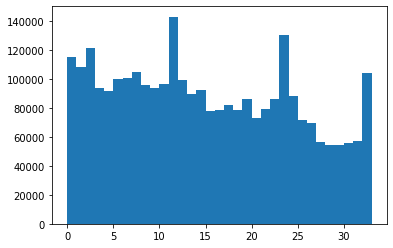

In [14]:
plt.hist(sales_rawdata.date_block_num, bins=max(sales_rawdata.date_block_num))

(array([115338., 108326., 121053.,  93865.,  91582., 100202., 100350.,
        104495.,  95918.,  93938.,  96503., 142921.,  99009.,  89550.,
         92530.,  77718.,  78382.,  82215.,  78554.,  86427.,  72943.,
         79169.,  86225., 130489.,  88199.,  71595.,  69766.,  56157.,
         54415.,  54497.,  55420.,  56913., 103829.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33.]),
 <a list of 33 Patch objects>)

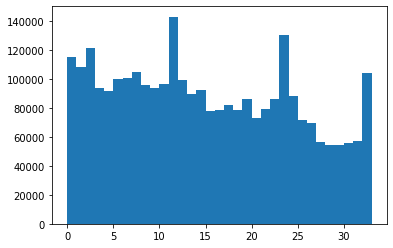

In [15]:
plt.hist(sales_rawdata.loc[sales_rawdata.item_cnt_day>0, 'date_block_num'], bins=max(sales_rawdata.date_block_num))

- It can be observed that the number of sales diminishes with time. There are some high points in months 11 (december), 23 (december), 33 (october!). Maybe the last month is not the best one as reference (baseline prediction). There was a sale? a big promotion?

In [16]:
tmp = sales_rawdata.loc[sales_rawdata.item_cnt_day>0, :].groupby('item_id')['item_price'].count().reset_index()

In [17]:
display(tmp.head(26))

,item_id,item_price
0,0,1
1,1,6
2,2,2
3,3,2
4,4,1
5,5,1
6,6,1
7,7,1
8,8,2
9,9,1


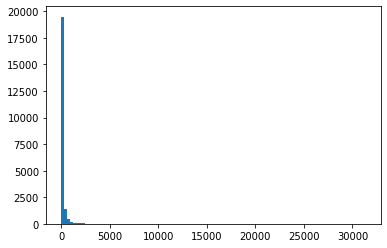

In [18]:
plt.hist(tmp.item_price, bins=100)
plt.show()

This plot shows that most items appear very few times. Let's take a look at log of this

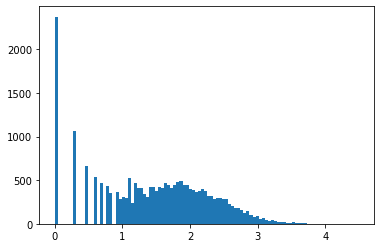

In [19]:
plt.hist(np.log10(tmp.item_price), bins=100)
plt.show()

This gives us a better idea. More than 2000 of the items appears only once in the whole dataset! And around 2000 more below 10 times. So for these items appearing only 1-10 times, it is by similarity with other items that they can be predicted.
In fact, they might mislead the prediction? I think they could be used to calculate averages of sales, of most trendy categories or stores (aggregated calculations) (and not pretty sure about that either), but probably they are tricky to consider as samples for training.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


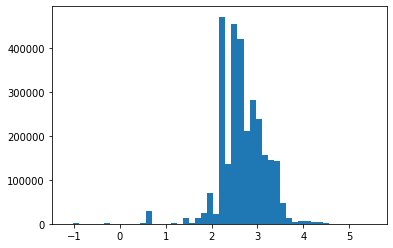

In [20]:
plt.hist(np.log10(sales_rawdata.loc[sales_rawdata.item_cnt_day>0].item_price), bins=50)
plt.show()

In [21]:
display(sales_rawdata.loc[sales_rawdata.item_price<0, :])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


There is an entry with negative price (??). Also, price ranges are quite wide, from less than 1 monetary unit to more than 10k monetary units. That shows that the items sold are quite different nature. Probably, pricy items are sold less than cheaper ones.



In [22]:
sales_rawdata['month_year'] = sales_rawdata['date'].apply(lambda date: date[2:])

In [23]:
display(sales_rawdata.month_year.unique())

array(['.01.2013', '.02.2013', '.03.2013', '.04.2013', '.05.2013',
       '.06.2013', '.07.2013', '.08.2013', '.09.2013', '.10.2013',
       '.11.2013', '.12.2013', '.01.2014', '.02.2014', '.03.2014',
       '.04.2014', '.05.2014', '.06.2014', '.07.2014', '.08.2014',
       '.09.2014', '.10.2014', '.11.2014', '.12.2014', '.01.2015',
       '.02.2015', '.03.2015', '.04.2015', '.05.2015', '.06.2015',
       '.07.2015', '.08.2015', '.09.2015', '.10.2015'], dtype=object)

There are no missing months

In [24]:
tmp = sales_rawdata.groupby(['date_block_num','shop_id']).agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'item_cnt_month'})
tmp = tmp.groupby('shop_id').agg(item_cnt_month_count=('item_cnt_month','count'), item_cnt_month_avg=('item_cnt_month', 'mean'), item_cnt_month_std=('item_cnt_month','std'), item_cnt_month_total=('item_cnt_month','sum')).reset_index()
display(tmp)

,shop_id,item_cnt_month_count,item_cnt_month_avg,item_cnt_month_std,item_cnt_month_total
0,0,2,5852.500000,388.201623,11705.0
1,1,2,3155.500000,294.863528,6311.0
2,2,34,900.588235,241.943033,30620.0
3,3,34,833.970588,164.053666,28355.0
4,4,34,1292.411765,442.615581,43942.0
5,5,33,1295.818182,294.292526,42762.0
6,6,34,2955.558824,956.451750,100489.0
7,7,34,1972.294118,583.917155,67058.0
8,8,4,898.750000,632.515810,3595.0
9,9,4,3966.500000,3038.135887,15866.0


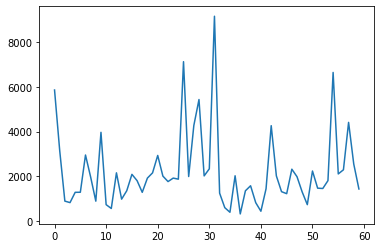

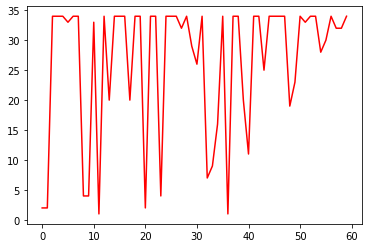

In [25]:
plt.plot(tmp.shop_id, tmp.item_cnt_month_avg)
plt.show()

plt.plot(tmp.shop_id, tmp.item_cnt_month_count, color='red')
plt.show()

We can see that some shops have a huge number of sales count in average, the variablity is high.

Also, the red plot shows that many shops have been running for many months, but there are some below 5 months... Should we do something about them? Flag as new, or short-lived...? 

It seems like one of the "new" shops has the highest average sales... Big temporal promotion? I need to take into account this big temporal differences. Let's see the proportion of total_sales/total_months_running

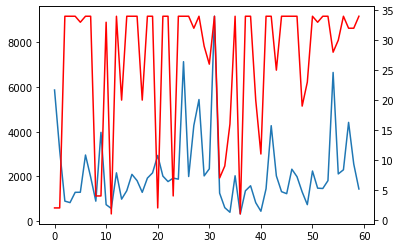

In [26]:
fig,ax = plt.subplots()
ax.plot(tmp.shop_id,tmp.item_cnt_month_total/tmp.item_cnt_month_count)
ax2=ax.twinx()
ax2.plot(tmp.shop_id, tmp.item_cnt_month_count, color='red')
plt.show()

Well, some of the shops with longest running times are the ones with highest ratio total_sales/total_months. But there are many with same number of months running, and varying ratio. And also there are shorter-lived shops with high ratios. It's tricky to consider these new shops, as there is no clear history for them, the current data might reflect opening sales/offers that will not sustain over time. The ratio total_sales/total_months might be related to location: not the same shop in big cities than small towns.

In [27]:
categories_rawdata = pd.read_csv('rawdata/items.csv')
sales_rawdata = sales_rawdata.merge(categories_rawdata, on='item_id')
display(sales_rawdata)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month_year,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,.01.2013,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,.01.2013,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,.01.2013,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,.01.2013,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,.01.2013,ЯВЛЕНИЕ 2012 (BD),37
...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,.10.2015,"АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)",40
2935845,01.10.2015,33,25,7903,12198.0,1.0,.10.2015,XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,.10.2015,WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,.10.2015,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


In [28]:
tmp = sales_rawdata.groupby('item_category_id').agg(category_price_avg=('item_price','mean'),
                                                    category_price_std=('item_price','std'),
                                                    category_price_median=('item_price','median'),
                                                    category_num_unique_items=('item_id','nunique'),
                                                    category_num_unique_shops=('shop_id','nunique'),
                                                    category_num_sold_items=('item_cnt_day','sum')).reset_index()

In [29]:
display(tmp.sort_values('category_price_avg', ascending=False))

,item_category_id,category_price_avg,category_price_std,category_price_median,category_num_unique_items,category_num_unique_shops,category_num_sold_items
12,12,22889.299108,3768.189388,22990.0,17,53,13230.0
16,16,18682.561005,8365.747367,20499.0,18,50,2827.0
11,11,12686.742018,2072.853817,13490.0,41,54,6403.0
15,15,12024.564613,2878.104814,11491.0,36,54,5980.0
14,14,9263.114423,1545.446646,9490.0,18,55,3062.0
...,...,...,...,...,...,...,...
0,0,87.800000,62.961258,93.0,3,3,3.0
66,66,76.778940,42.959877,70.0,178,23,5910.0
82,82,32.481014,17.040604,30.0,8,23,10437.0
50,50,20.500000,4.949747,20.5,2,1,3.0


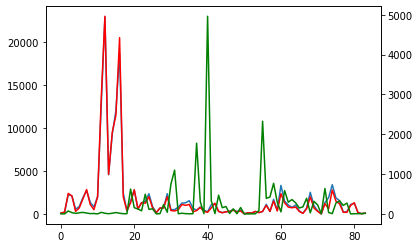

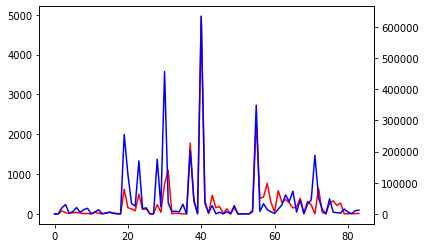

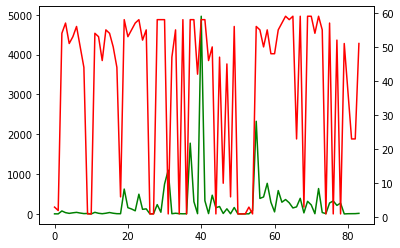

In [30]:
fig, ax = plt.subplots()
ax.plot(tmp.item_category_id, tmp.category_price_avg) 
ax.plot(tmp.item_category_id, tmp.category_price_median, color = 'red')
ax3 = ax.twinx()
ax3.plot(tmp.item_category_id, tmp.category_num_unique_items, color = 'green')
plt.show()

fig, ax = plt.subplots()
ax.plot(tmp.item_category_id, tmp.category_num_unique_items, color = 'red')
ax2 = ax.twinx()
ax2.plot(tmp.item_category_id, tmp.category_num_sold_items, color = 'blue')
plt.show()

fig, ax = plt.subplots()
ax.plot(tmp.item_category_id, tmp.category_num_unique_items, color = 'green')
ax3 = ax.twinx()
ax3.plot(tmp.item_category_id, tmp.category_num_unique_shops, color = 'red')
plt.show()


There are around 80 different categories. 

There are no big differences in general between median and mean, so it seems that the majority of items in a category are of similar values. 

There are 2 categories with much higher mean and median values. These categories have very few different items, whereas other categories with lower price have almost 2000 and 5000 different items!

In the second plot, we can observe that the number of unique items in a category is a good proxy for the number of items sold of that category... it seems it can be a good feature.

Also in the third plot we can see that some categories are sold in very few shops, whereas the majority of them are sold in the majority of shops.

This can be measured not only in the whole dataset, but in the previous month, lasy 6 months, last 12 months.



In [31]:
tmp = sales_rawdata.groupby('shop_id').agg(sales_volume = ('item_cnt_day', 'sum'),
                                           num_unique_items = ('item_id', 'nunique'),
                                           num_unique_categories = ('item_category_id', 'nunique')).reset_index()
display(tmp.head())

,shop_id,sales_volume,num_unique_items,num_unique_categories
0,0,11705.0,3600,48
1,1,6311.0,2523,41
2,2,30620.0,4849,59
3,3,28355.0,5261,58
4,4,43942.0,7309,61


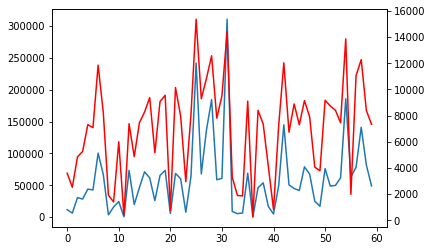

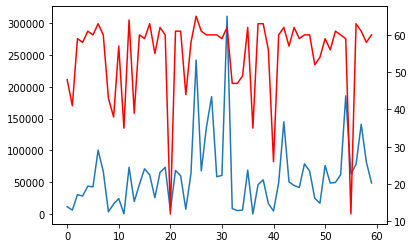

In [32]:
fig, ax = plt.subplots()
ax.plot(tmp.shop_id, tmp.sales_volume)
ax2 = ax.twinx()
ax2.plot(tmp.shop_id, tmp.num_unique_items, color = 'red')
plt.show()

fig, ax = plt.subplots()
ax.plot(tmp.shop_id, tmp.sales_volume)
ax2 = ax.twinx()
ax2.plot(tmp.shop_id, tmp.num_unique_categories, color = 'red')
plt.show()

It seems to be some correlation among the number of different items sold in a shop and the sales volume. It might be handy to have a comparative feature of % of items sold in the shop.

With respect to the categories, the correlation is not so clear to me.

In [33]:
item_median_price = sales_rawdata.groupby('item_id').agg(median_price = ('item_price', 'median'),
                                                      num_shops = ('shop_id', 'nunique')).reset_index()
display(item_median_price.sort_values('num_shops', ascending = False).head())

,item_id,median_price,num_shops
3014,3076,799.0,58
2263,2308,299.0,58
2749,2808,999.0,58
5717,5822,1049.0,58
3015,3077,799.0,57


In [34]:
tmp = sales_rawdata.merge(item_median_price, on = 'item_id')
tmp['overprice'] = (tmp['item_price']-tmp['median_price']) / tmp['median_price']
tmp['exclusivity'] = 1 - tmp['num_shops']/tmp.shop_id.nunique()
tmp2 = tmp.groupby('shop_id').agg(sales_volume = ('item_cnt_day', 'sum'),
                                  mean_overprice = ('overprice', 'mean'),
                                  mean_exclusivity = ('exclusivity', 'mean')).reset_index()
                                  

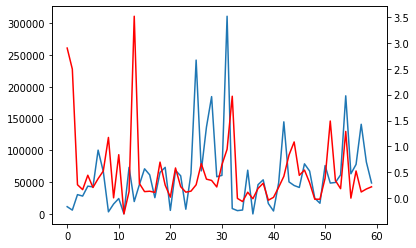

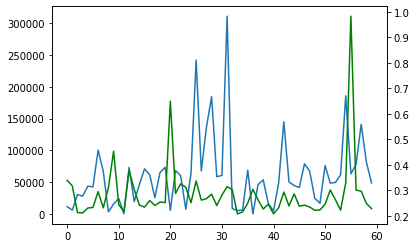

In [35]:
fig, ax = plt.subplots()
ax.plot(tmp2.shop_id, tmp2.sales_volume)
ax2 = ax.twinx()
ax2.plot(tmp2.shop_id, tmp2.mean_overprice, color = 'red')
plt.show()

fig, ax = plt.subplots()
ax.plot(tmp2.shop_id, tmp2.sales_volume)
ax2 = ax.twinx()
ax2.plot(tmp2.shop_id, tmp2.mean_exclusivity, color = 'green')
plt.show()

The overprice seems to be somehow related to the sales volume of the shops (though not entirely). The exclusivity is not so related.

Anyway, these might be useful features when calculated over time (last month, last 6 months, last 12 months)

In [36]:
tmp = sales_rawdata.groupby('date_block_num').agg(sales_volume = ('item_cnt_day', 'sum'),
                                            nunique_category = ('item_category_id', 'nunique'),
                                            nunique_shops = ('shop_id', 'nunique')).reset_index()

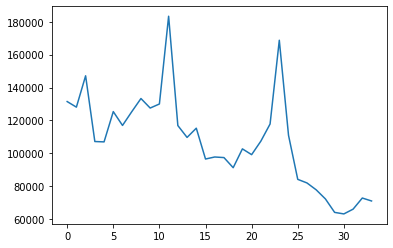

In [37]:
plt.plot(tmp.date_block_num, tmp.sales_volume)
plt.show()

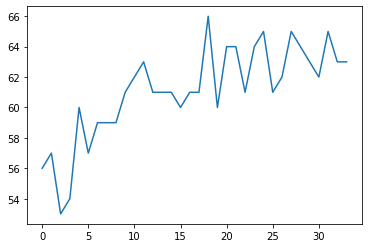

In [38]:
plt.plot(tmp.date_block_num, tmp.nunique_category)
plt.show()

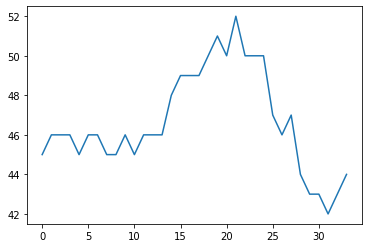

In [39]:
plt.plot(tmp.date_block_num, tmp.nunique_shops)
plt.show()

# Feature cleaning and engineering

In [40]:
sales_rawdata = pd.read_csv('rawdata/sales_train.csv')
shops_rawdata = pd.read_csv('rawdata/shops.csv')
categories_rawdata = pd.read_csv('rawdata/item_categories.csv')
items_rawdata = pd.read_csv('rawdata/items.csv')


In [41]:
sales_rawdata = sales_rawdata.merge(items_rawdata.loc[:, ['item_id', 'item_category_id']], on = 'item_id')
display(sales_rawdata.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37


In [42]:
# First, the dataset is going to be considered complete, i.e., with returns
sales_data = sales_rawdata.copy(deep=True)
sales_data['month'] = sales_data['date'].apply(lambda date_str: int(date_str[3:5]))
sales_data['year'] = sales_data['date'].apply(lambda date_str: int(date_str[6:]))
sales_data['month_year'] = sales_data['date'].apply(lambda date_str: date_str[3:])


In [43]:
year_totals = sales_data.groupby('year').agg(item_count_year = ('item_cnt_day', 'sum'),
                                             item_nunique_year = ('item_id', 'nunique'),
                                             cat_nunique_year = ('item_category_id', 'nunique'),
                                             shop_nunique_year = ('shop_id', 'nunique')).reset_index()
display(year_totals)

,year,item_count_year,item_nunique_year,cat_nunique_year,shop_nunique_year
0,2013,1562733.0,14971,70,52
1,2014,1320889.0,14108,73,53
2,2015,764584.0,11249,73,54


In [45]:
month_features = sales_data.groupby(['date_block_num','month','year']).agg(item_count_month = ('item_cnt_day', 'sum'),
                                                                  item_nunique_month = ('item_id', 'nunique'),
                                                                  cat_nunique_month = ('item_category_id', 'nunique'),
                                                                  shop_nunique_month = ('shop_id', 'nunique')).reset_index()
display(month_features.head(20))

,date_block_num,month,year,item_count_month,item_nunique_month,cat_nunique_month,shop_nunique_month
0,0,1,2013,131479.0,8115,56,45
1,1,2,2013,128090.0,8168,57,46
2,2,3,2013,147142.0,8302,53,46
3,3,4,2013,107190.0,8145,54,46
4,4,5,2013,106970.0,8339,60,45
5,5,6,2013,125381.0,8478,57,46
6,6,7,2013,116966.0,8405,59,46
7,7,8,2013,125291.0,8031,59,45
8,8,9,2013,133332.0,7876,59,45
9,9,10,2013,127541.0,8039,61,46


In [95]:
[25]

[25]

In [107]:
m = sales_data.duplicated('item_id')
d = sales_data['date_block_num']

display((~m).cumsum().groupby(d).last())

def items_nunique(data_per_month, ref_date_block, number_blocks):
  list_of_item_lists = data_per_month.loc[(data_per_month.date_block_num>=max(0, ref_date_block-number_blocks+1)) 
                                          & (data_per_month.date_block_num<=ref_date_block), :]
  if list_of_item_lists.shape[0] > 0:
    #print('not empty')
    #list_of_item_lists = list_of_item_lists['item_id'].apply(lambda row: [row.item_id] if not isinstance(row, list) else row)
    #print(list_of_item_lists.to_list())
    final_list = set(x for l in list_of_item_lists['item_id'].to_list() for x in l)
    return len(final_list)
  else:
    return 0

def category_items_nunique(data_per_month, ref_date_block, number_blocks, category_ref):
  list_of_item_lists = data_per_month.loc[(data_per_month.date_block_num>=max(0, ref_date_block-number_blocks+1)) 
                                          & (data_per_month.date_block_num<=ref_date_block) 
                                          & (data_per_month.item_category_id==category_ref), 'item_id']
  if list_of_item_lists.shape[0] > 1:
    #print('not empty')
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print(list_of_item_lists.to_list())
    final_list = set(x for l in list_of_item_lists.to_list() for x in l)
    return len(final_list)
  elif list_of_item_lists.shape[0] == 1:
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print('one element')
    #print(list_of_item_lists)
    return len(set(list_of_item_lists))
  else:
    return 0

def category_shops_nunique(data_per_month, ref_date_block, number_blocks, category_ref):
  list_of_item_lists = data_per_month.loc[(data_per_month.date_block_num>=max(0, ref_date_block-number_blocks+1)) 
                                          & (data_per_month.date_block_num<=ref_date_block) 
                                          & (data_per_month.item_category_id==category_ref), 'shop_id']
  #print("what's going on")
  #print(list_of_item_lists)
  if list_of_item_lists.shape[0] > 1:
    #print('not empty')
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print(list_of_item_lists.to_list())
    final_list = set(x for l in list_of_item_lists.to_list() for x in l)
    return len(final_list)
  elif list_of_item_lists.shape[0] == 1:
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print('one element')
    #print(list_of_item_lists)
    return len(set(list_of_item_lists))
  else:
    return 0

def shop_items_nunique(data_per_month, ref_date_block, number_blocks, shop_ref):
  list_of_item_lists = data_per_month.loc[(data_per_month.date_block_num>=max(0, ref_date_block-number_blocks+1)) 
                                          & (data_per_month.date_block_num<=ref_date_block) 
                                          & (data_per_month.shop_id==shop_ref), 'item_id']
  if list_of_item_lists.shape[0] > 1:
    #print('not empty')
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print(list_of_item_lists.to_list())
    final_list = set(x for l in list_of_item_lists.to_list() for x in l)
    return len(final_list)
  elif list_of_item_lists.shape[0] == 1:
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print('one element')
    #print(list_of_item_lists)
    return len(set(list_of_item_lists))
  else:
    return 0

def shop_categories_nunique(data_per_month, ref_date_block, number_blocks, shop_ref):
  list_of_item_lists = data_per_month.loc[(data_per_month.date_block_num>=max(0, ref_date_block-number_blocks+1)) 
                                          & (data_per_month.date_block_num<=ref_date_block) 
                                          & (data_per_month.shop_id==shop_ref), 'item_category_id']
  if list_of_item_lists.shape[0] > 1:
    #print('not empty')
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print(list_of_item_lists.to_list())
    final_list = set(x for l in list_of_item_lists.to_list() for x in l)
    return len(final_list)
  elif list_of_item_lists.shape[0] == 1:
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print('one element')
    #print(list_of_item_lists)
    return len(set(list_of_item_lists))
  else:
    return 0

def shop_category_items_nunique(data_per_month, ref_date_block, number_blocks, category_ref, shop_ref):
  list_of_item_lists = data_per_month.loc[(data_per_month.date_block_num>=max(0, ref_date_block-number_blocks+1)) 
                                          & (data_per_month.date_block_num<=ref_date_block) 
                                          & (data_per_mont.item_category_id==category_ref)
                                          & (data_per_month.shop_id==shop_ref), 'item_id']
  if list_of_item_lists.shape[0] > 1:
    #print('not empty')
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print(list_of_item_lists.to_list())
    final_list = set(x for l in list_of_item_lists.to_list() for x in l)
    return len(final_list)
  elif list_of_item_lists.shape[0] == 1:
    list_of_item_lists = list_of_item_lists.apply(lambda row: [row] if not isinstance(row, list) else row)
    #print('one element')
    #print(list_of_item_lists)
    return len(set(list_of_item_lists))
  else:
    return 0


sales_month_category = sales_data.groupby(['date_block_num', 'item_category_id', 'shop_id']).item_id.unique().reset_index()
display(sales_month_category)

sales_month_category['items_nunique_6m_cum'] = sales_month_category.apply(lambda row: items_nunique(sales_month_category, row.date_block_num, 6), axis=1)
display(sales_month_category)

sales_month_category['category_items_nunique_6m_cum'] = sales_month_category.apply(lambda row: category_items_nunique(sales_month_category, row.date_block_num, 6, row.item_category_id), axis=1)
display(sales_month_category)

#sales_month_category = sales_data.groupby(['date_block_num', 'item_category_id', 'shop_id']).item_id.unique().reset_index()
sales_month_category['category_shops_nunique_6m_cum'] = sales_month_category.apply(lambda row: category_shops_nunique(sales_month_category, row.date_block_num, 6, row.item_category_id), axis=1)
display(sales_month_category)

#sales_month_shop = sales_data.groupby(['date_block_num', 'shop_id']).item_id.unique().reset_index()
sales_month_shop['shop_items_nunique_6m_cum'] = sales_month_shop.apply(lambda row: shop_items_nunique(sales_month_category, row.date_block_num, 6, row.shop_id), axis=1)
display(sales_month_shop)

#sales_month_shop = sales_data.groupby(['date_block_num', 'shop_id']).item_id.unique().reset_index()
sales_month_shop['shop_categories_nunique_6m_cum'] = sales_month_shop.apply(lambda row: shop_categories_nunique(sales_month_category, row.date_block_num, 6, row.shop_id), axis=1)
display(sales_month_shop)

#sales_month_category_shop = sales_data.groupby(['date_block_num', 'item_category_id', 'shop_id']).item_id.unique().reset_index()
sales_month_category_shop['category_shop_items_nunique_6m_cum'] = sales_month_category_shop.apply(lambda row: shop_category_items_nunique(sales_month_category, row.date_block_num, 6, row.item_category_id, row.shop_id), axis=1)
display(sales_month_category_shop)
 
#p = sales_data.copy(deep = True)
#p.date =  pd.to_datetime(p.date, format="%d.%m.%Y")
#p.rolling(min_periods=1, window='6m', on='date').item_id.nunique()

date_block_num
0      8115
1      9352
2     10150
3     10778
4     11460
5     11991
6     12438
7     12908
8     13292
9     13946
10    14435
11    14971
12    15178
13    15517
14    15827
15    16146
16    16408
17    16661
18    16977
19    17227
20    17557
21    18115
22    18575
23    19047
24    19244
25    19469
26    19805
27    20067
28    20292
29    20542
30    20748
31    21030
32    21332
33    21807
dtype: int64

KeyboardInterrupt: ignored

In [46]:
month_features = month_features.merge(year_totals, on='year')


In [48]:
display(month_features.head(10))

,date_block_num,month,year,item_count_month,item_nunique_month,cat_nunique_month,shop_nunique_month,item_count_year,item_nunique_year,cat_nunique_year,shop_nunique_year
0,0,1,2013,131479.0,8115,56,45,1562733.0,14971,70,52
1,1,2,2013,128090.0,8168,57,46,1562733.0,14971,70,52
2,2,3,2013,147142.0,8302,53,46,1562733.0,14971,70,52
3,3,4,2013,107190.0,8145,54,46,1562733.0,14971,70,52
4,4,5,2013,106970.0,8339,60,45,1562733.0,14971,70,52
5,5,6,2013,125381.0,8478,57,46,1562733.0,14971,70,52
6,6,7,2013,116966.0,8405,59,46,1562733.0,14971,70,52
7,7,8,2013,125291.0,8031,59,45,1562733.0,14971,70,52
8,8,9,2013,133332.0,7876,59,45,1562733.0,14971,70,52
9,9,10,2013,127541.0,8039,61,46,1562733.0,14971,70,52


In [50]:
month_features['item_count_month_frac'] = month_features['item_count_month']/month_features['item_count_year']
month_features['item_nunique_month'] = month_features['item_nunique_month']/month_features['item_nunique_year']
month_features['cat_nunique_month'] = month_features['cat_nunique_month']/month_features['cat_nunique_year']
month_features['shop_nunique_month'] = month_features['shop_nunique_month']/month_features['shop_nunique_year']
month_features['item_count_cum'] = month_features['item_count_month'].cumsum()
display(month_features.head(20))

,date_block_num,month,year,item_count_month,item_nunique_month,cat_nunique_month,shop_nunique_month,item_count_year,item_nunique_year,cat_nunique_year,shop_nunique_year,item_count_month_frac
0,0,1,2013,131479.0,0.542048,0.800000,0.865385,1562733.0,14971,70,52,0.084134
1,1,2,2013,128090.0,0.545588,0.814286,0.884615,1562733.0,14971,70,52,0.081965
2,2,3,2013,147142.0,0.554539,0.757143,0.884615,1562733.0,14971,70,52,0.094157
3,3,4,2013,107190.0,0.544052,0.771429,0.884615,1562733.0,14971,70,52,0.068591
4,4,5,2013,106970.0,0.557010,0.857143,0.865385,1562733.0,14971,70,52,0.068451
5,5,6,2013,125381.0,0.566295,0.814286,0.884615,1562733.0,14971,70,52,0.080232
6,6,7,2013,116966.0,0.561419,0.842857,0.884615,1562733.0,14971,70,52,0.074847
7,7,8,2013,125291.0,0.536437,0.842857,0.865385,1562733.0,14971,70,52,0.080174
8,8,9,2013,133332.0,0.526084,0.842857,0.865385,1562733.0,14971,70,52,0.085320
9,9,10,2013,127541.0,0.536971,0.871429,0.884615,1562733.0,14971,70,52,0.081614


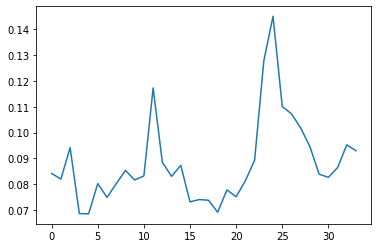

In [51]:
plt.plot(month_features.date_block_num, month_features.item_count_month_frac)
plt.show()

# Feature selection

# Modeling

# Evaluation

# Submission